<a href="https://colab.research.google.com/github/RyanMokarian/Digit_Numbers_Classification/blob/master/Digit_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digit Numbers Classification

### Dataset: MNIST

### Algorithm: Deep Learning (Convolutional Neural Network)

### Author: Ryan Mokarian, March 4, 2020

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pandas as pd
path = "/content/drive/My Drive/Colab Notebooks/JumioMnistTest/mnist.csv"
df = pd.read_csv(path)
X_df = df.iloc[:, 1:]
y_df = df.iloc[:, 0]
X = X_df.to_numpy()
y = y_df.to_numpy()
X.shape, y.shape

((42000, 784), (42000,))

Visualizing the first two images with matplotlib and adding a channel dimension.


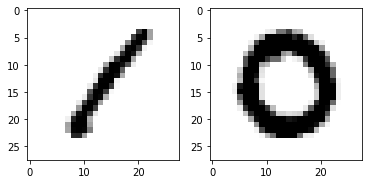

The first and second images lables are 1 ,  0
Dimension after adding a channel is:
1st image:  (28, 28, 1)
2nd image:  (28, 28, 1)
X shape is:  (42000, 28, 28, 1)


In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from numpy import expand_dims

image1, image2 = X[0].reshape(28, 28), X[1].reshape(28, 28)
f = plt.figure()
f.add_subplot(1,2, 1)
plt.imshow(image1, cmap='binary')
f.add_subplot(1,2, 2)
plt.imshow(image2, cmap='binary')
plt.show(block=True)
print('The first and second images lables are', y[0], ', ', y[1])
# add a dimension
image1_added_Dimension = expand_dims(image1, axis=2)
image2_added_Dimension = expand_dims(image2, axis=2)
print('Dimension after adding a channel is:')
print('1st image: ', image1_added_Dimension.shape)
print('2nd image: ', image2_added_Dimension.shape)
X = X.reshape(X.shape[0], 28, 28)
X = X[..., np.newaxis]
print('X shape is: ',X.shape)

In [0]:
from sklearn.model_selection import train_test_split

z = np.max(y) + 1
y_onehot = np.eye(z)[y]

X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.25)

print(X_train.shape)
print(y_train.shape)
print('X_test.shape : ', X_test.shape)

(31500, 28, 28, 1)
(31500, 10)
X_test.shape :  (10500, 28, 28, 1)


Using keras to create a CNN model

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(16, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [0]:
from keras.optimizers import SGD
from keras import metrics

opt = SGD(lr=1e-4)
model.compile(optimizer=opt, loss='categorical_crossentropy', \
metrics=['accuracy'])

Fit the model

In [0]:
model.fit(X_train, y_train, epochs=6, batch_size=32, verbose=0)

Prediciton on the test set 


In [0]:
prediction = model.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

predictions = model.predict_classes(X_test, batch_size=128, verbose=0)
labels=np.argmax(y_test, axis=1)
cm = confusion_matrix(labels, predictions)
print("(1) Confusion matrix:\n")
print(cm)
print("According to the above confusion matrix, class 4 confused most often.")
print('True positive rate, for class 4 is 919/970 = % 95')
print('False positive rate, for class 4 is 51/970 = % 5')
print("\n(2)Accuracy score:"+str(accuracy_score(labels, predictions)))
print("\n(3) Classification report:\n")
print(classification_report(labels, predictions))

(1) Confusion matrix:

[[1053    0    3    1    1    4    6    2    8    4]
 [   0 1095    6    0    5    2    2    3    5    1]
 [   3    3  995   10    7    0    4   13    9    5]
 [   8    2   19 1017    0   21    1    6    9    3]
 [   2    3    2    0  919    0    7    5    4   28]
 [   3    3    0   21    2  930   10    1   18    6]
 [  12    2    2    0    6    6 1005    0    4    1]
 [   1    2   12   11    2    1    0 1046    2   15]
 [   4    5    7    6    6    5   11    2  932   18]
 [   8    3    2    6   31    8    0   15   11  990]]
According to the above confusion matrix, class 4 confused most often.
True positive rate, for class 4 is 919/970 = % 95
False positive rate, for class 4 is 51/970 = % 5

(2)Accuracy score:0.9506666666666667

(3) Classification report:

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1082
           1       0.98      0.98      0.98      1119
           2       0.95      0.95      0.95    